In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NE_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,NaN,0.47,0.13,0.5,0.0,0.48,0.22
1,NaN,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,NaN,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,NaN,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	111
float64		column 2	222
float64		column 3	222
float64		column 4	148
float64		column 5	185
float64		column 6	148
float64		column 7	0
float64		column 8	148


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1373.000000,1262.00000,1262.000000,1336.000000,1299.000000,1336.000000,1484.000000,1336.000000
mean,0.500131,0.49752,0.500864,0.259588,0.503849,0.007710,0.499885,0.275030
std,0.133832,0.11654,0.083504,0.134111,0.043717,0.076485,0.057797,0.102916
min,0.170000,0.14000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.42250,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.49000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.56000,0.550000,0.310000,0.500000,0.000000,0.530000,0.300000
max,0.940000,1.00000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

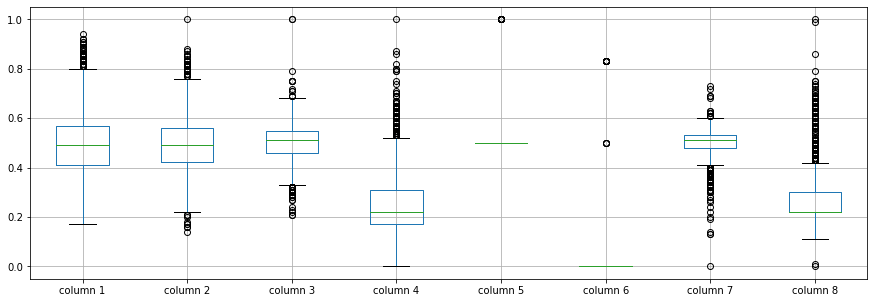

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500131
column 2    0.497520
column 3    0.500864
column 4    0.259588
column 5    0.503849
column 6    0.007710
column 7    0.499885
column 8    0.275030
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.540470,-0.109108,0.144951,0.041565,0.010533,0.077242,-0.124853
column 2,0.540470,1.000000,-0.232319,0.138093,0.026370,-0.002854,0.082635,-0.094778
column 3,-0.109108,-0.232319,1.000000,0.078562,-0.005947,0.004420,-0.191133,-0.001445
column 4,0.144951,0.138093,0.078562,1.000000,-0.002131,-0.013197,-0.120218,-0.057632
column 5,0.041565,0.026370,-0.005947,-0.002131,1.000000,-0.008893,0.063180,0.023068
column 6,0.010533,-0.002854,0.004420,-0.013197,-0.008893,1.000000,0.019020,-0.047525
column 7,0.077242,0.082635,-0.191133,-0.120218,0.063180,0.019020,1.000000,0.071013
column 8,-0.124853,-0.094778,-0.001445,-0.057632,0.023068,-0.047525,0.071013,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+22,8+22+22,8+22+22+22,8+22+22+22+22,8+22+22+22+22+22,8+22+22+22+22+22+22,8+22+22+22+22+22,8+22+22+22+22,8+22+22+22,8+22+22,8+22,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.7157093156938967
Epoch: 1 , loss: 2.3318121601705966
Epoch: 2 , loss: 2.111138192207917
Epoch: 3 , loss: 1.9810878310514533
Epoch: 4 , loss: 1.8492458255394646
Epoch: 5 , loss: 1.773447336062141
Epoch: 6 , loss: 1.6963220510793768
Epoch: 7 , loss: 1.6099543973155643
Epoch: 8 , loss: 1.5406054919180663
Epoch: 9 , loss: 1.4938308492950771
Epoch: 10 , loss: 1.4223104870837668
Epoch: 11 , loss: 1.3728272513203
Epoch: 12 , loss: 1.350739169379939
Epoch: 13 , loss: 1.3048240697902183
Epoch: 14 , loss: 1.270742887388105
Epoch: 15 , loss: 1.2418236784313037
Epoch: 16 , loss: 1.2233701905478602
Epoch: 17 , loss: 1.1991362727206687
Epoch: 18 , loss: 1.1790117090163024
Epoch: 19 , loss: 1.1522959697505701
Epoch: 20 , loss: 1.1327661094458208
Epoch: 21 , loss: 1.1240639887426211
Epoch: 22 , loss: 1.1252588079027508
Epoch: 23 , loss: 1.092702131556428
Epoch: 24 , loss: 1.0869123974572057
Epoch: 25 , loss: 1.073210

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.000000,-0.144452,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.222841,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.082192,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1479,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1480,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1481,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
1482,0.000000,0.000000,-0.131567,0.0,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(5.916500252178757, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.12614024647698077

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.580000,0.465548,0.470000,0.13,0.500000,0.0,0.48,0.22
1,0.652841,0.670000,0.480000,0.27,0.500000,0.0,0.53,0.22
2,0.640000,0.620000,0.490000,0.15,0.500000,0.0,0.53,0.22
3,0.580000,0.522192,0.570000,0.13,0.500000,0.0,0.54,0.22
4,0.420000,0.440000,0.480000,0.54,0.500000,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.820000,0.630000,0.470000,0.18,0.500000,0.0,0.50,0.22
1480,0.350000,0.290000,0.460000,0.14,0.500000,0.0,0.54,0.66
1481,0.410000,0.470000,0.500000,0.14,0.500000,0.0,0.53,0.37
1482,0.510000,0.450000,0.488433,0.25,0.500000,0.0,0.59,0.22


In [20]:
imputations[-1].to_excel("Yeast_NE_10(imp).xlsx", index=False, header=False)